##### Import Necessary Modules Required for EDA

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'data.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,4/8/2016,"$141,604",15%,United States,Seattle,10/16/2021
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,11/29/1997,"$99,975",0%,China,Chongqing,NaN
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,10/26/2006,"$163,099",20%,United States,Chicago,NaN
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,9/27/2019,"$84,913",7%,United States,Chicago,NaN
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,11/20/1995,"$95,409",0%,United States,Phoenix,NaN


In [4]:
df.dtypes

EEID             object
Full Name        object
Job Title        object
Department       object
Business Unit    object
Gender           object
Ethnicity        object
Age               int64
Hire Date        object
Annual Salary    object
Bonus %          object
Country          object
City             object
Exit Date        object
dtype: object

In [5]:
df.columns

Index(['EEID', 'Full Name', 'Job Title', 'Department', 'Business Unit',
       'Gender', 'Ethnicity', 'Age', 'Hire Date', 'Annual Salary', 'Bonus %',
       'Country', 'City', 'Exit Date'],
      dtype='object')

In [6]:
columns = df.columns
columns = columns.str.replace(' ','_')
columns = columns.str.replace('Bonus_%','Bonus')
columns = columns.str.lower()
columns

Index(['eeid', 'full_name', 'job_title', 'department', 'business_unit',
       'gender', 'ethnicity', 'age', 'hire_date', 'annual_salary', 'bonus',
       'country', 'city', 'exit_date'],
      dtype='object')

In [7]:
rename_dict = dict(zip(df.columns, columns))
df.rename(columns=rename_dict, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   eeid           1000 non-null   object
 1   full_name      1000 non-null   object
 2   job_title      1000 non-null   object
 3   department     1000 non-null   object
 4   business_unit  1000 non-null   object
 5   gender         1000 non-null   object
 6   ethnicity      1000 non-null   object
 7   age            1000 non-null   int64 
 8   hire_date      1000 non-null   object
 9   annual_salary  1000 non-null   object
 10  bonus          1000 non-null   object
 11  country        1000 non-null   object
 12  city           1000 non-null   object
 13  exit_date      85 non-null     object
dtypes: int64(1), object(13)
memory usage: 109.5+ KB


In [9]:
df.drop(columns='exit_date', inplace=True)

In [10]:
df['annual_salary'] = df['annual_salary'].str.replace('$', '')
df['annual_salary'] = df['annual_salary'].str.replace(',', '')
df['annual_salary'] = pd.to_numeric(df['annual_salary'])

In [11]:
df['bonus'] = df['bonus'].str.replace('%', '')
df['bonus'] = pd.to_numeric(df['bonus'])
df['bonus'] = df['bonus']*0.01

In [12]:
df['hire_date'] = pd.to_datetime(df['hire_date'])

In [13]:
df.dtypes

eeid                     object
full_name                object
job_title                object
department               object
business_unit            object
gender                   object
ethnicity                object
age                       int64
hire_date        datetime64[ns]
annual_salary             int64
bonus                   float64
country                  object
city                     object
dtype: object

In [14]:
df.describe()

,age,hire_date,annual_salary,bonus
count,1000.000000,1000,1000.000000,1000.000000
mean,44.382000,2012-04-07 02:54:14.400000,113217.365000,0.088660
min,25.000000,1992-01-09 00:00:00,40063.000000,0.000000
25%,35.000000,2007-02-14 00:00:00,71430.250000,0.000000
50%,45.000000,2014-02-15 12:00:00,96557.000000,0.000000
75%,54.000000,2018-06-22 00:00:00,150782.250000,0.150000
max,65.000000,2021-12-26 00:00:00,258498.000000,0.400000
std,11.246981,NaN,53545.985644,0.117856


In [15]:
from sqlalchemy import create_engine
import cred

In [16]:
engine = create_engine(f'postgresql://{cred.username}:{cred.password}@{cred.host}:{cred.port}/{cred.database}')

In [17]:
try:
    df.to_sql('employees', con=engine.connect() , index=False)
except ValueError as e:
    print("Table named employees already exists")

Table named employees already exists


##### Data is Cleaned and Loaded to SQL for EDA

In [18]:
%%sql
SELECT *
FROM employees
LIMIT 10;

,eeid,full_name,job_title,department,business_unit,gender,ethnicity,age,hire_date,annual_salary,bonus,country,city
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08 00:00:00.000000,141604,0.15,United States,Seattle
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29 00:00:00.000000,99975,0.00,China,Chongqing
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26 00:00:00.000000,163099,0.20,United States,Chicago
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27 00:00:00.000000,84913,0.07,United States,Chicago
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20 00:00:00.000000,95409,0.00,United States,Phoenix
5,E00644,Joshua Gupta,Account Representative,Sales,Corporate,Male,Asian,57,2017-01-24 00:00:00.000000,50994,0.00,China,Chongqing
6,E01550,Ruby Barnes,Manager,IT,Corporate,Female,Caucasian,27,2020-07-01 00:00:00.000000,119746,0.10,United States,Phoenix
7,E04332,Luke Martin,Analyst,Finance,Manufacturing,Male,Black,25,2020-05-16 00:00:00.000000,41336,0.00,United States,Miami
8,E04533,Easton Bailey,Manager,Accounting,Manufacturing,Male,Caucasian,29,2019-01-25 00:00:00.000000,113527,0.06,United States,Austin
9,E03838,Madeline Walker,Sr. Analyst,Finance,Speciality Products,Female,Caucasian,34,2018-06-13 00:00:00.000000,77203,0.00,United States,Chicago


In [19]:
%%sql
SELECT job_title, COUNT(*) AS No_Of_Employees, AVG(annual_salary) AS Avg_Salary
FROM employees
GROUP BY job_title
ORDER BY 2 DESC, 3 DESC;

,job_title,no_of_employees,avg_salary
0,Director,121,171633.851240
1,Sr. Manger,110,141067.763636
2,Vice President,105,222195.171429
3,Manager,98,113275.683673
4,Sr. Analyst,70,86402.957143
5,Analyst II,53,62647.471698
6,Analyst,51,49950.666667
7,Computer Systems Manager,21,80346.809524
8,Field Engineer,21,78928.952381
9,Account Representative,21,62281.619048


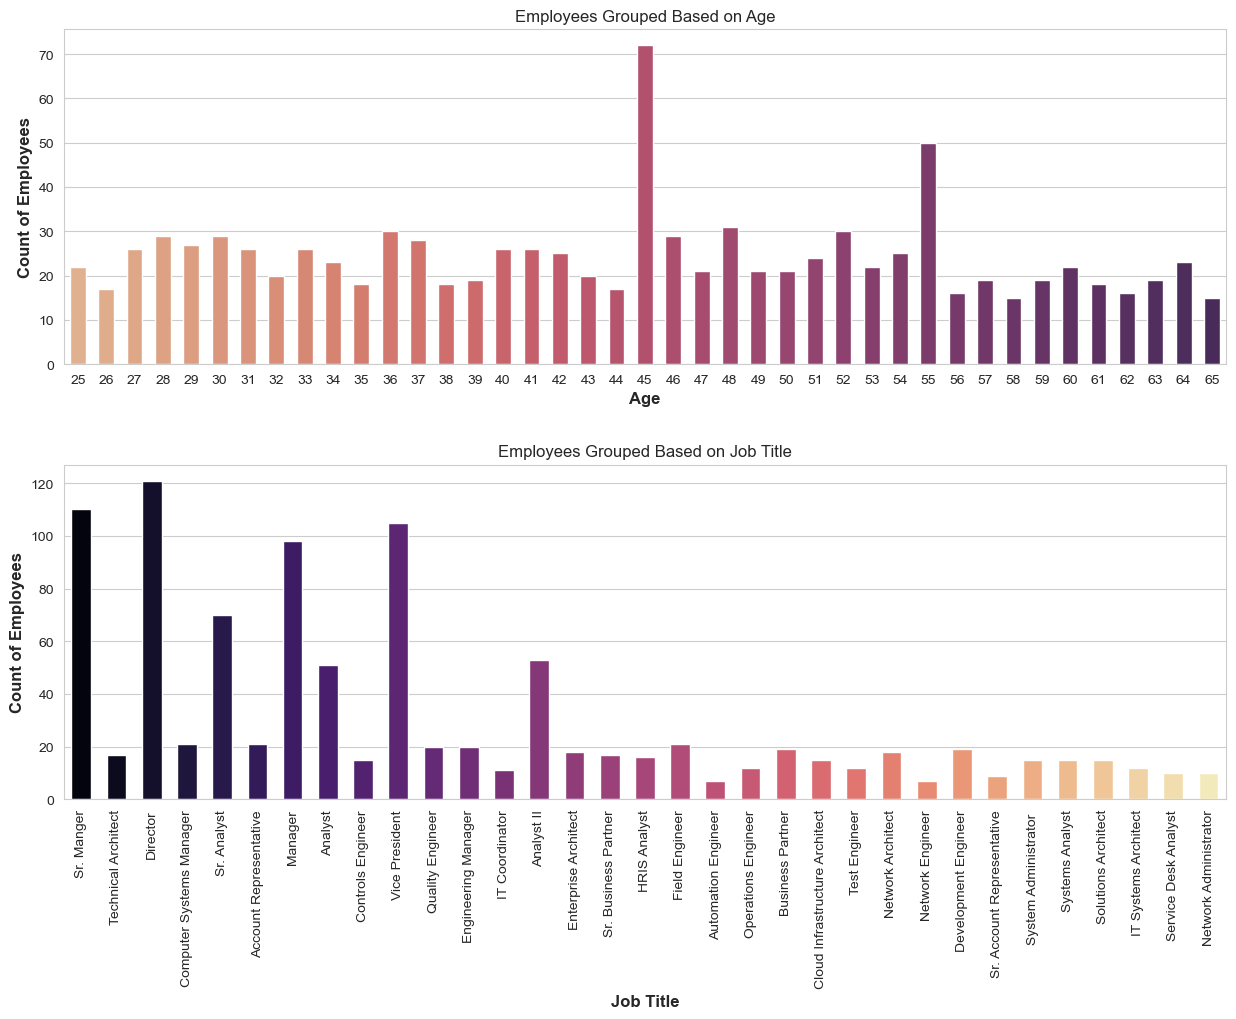

In [20]:
plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
sns.countplot(df, x = 'age', gap=0.3, palette='flare', hue='age', legend=False)
plt.title('Employees Grouped Based on Age')
plt.xlabel('Age', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.ylabel('Count of Employees', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.subplots_adjust(hspace=0.3)
plt.subplot(2,1,2)
sns.countplot(df, x = 'job_title', gap=0.3, palette='magma', hue='job_title', legend=False)
plt.title('Employees Grouped Based on Job Title')
plt.xlabel('Job Title', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.ylabel('Count of Employees', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.xticks(rotation=90)
plt.show()

In [21]:
avg_salary_by_job = df.groupby('job_title').agg({'annual_salary':'mean'})

In [22]:
avg_salary_by_job.sort_values(by='annual_salary', ascending=False)

,annual_salary
job_title,
Vice President,222195.171429
Director,171633.851240
Sr. Manger,141067.763636
Manager,113275.683673
Engineering Manager,101853.800000
Operations Engineer,101135.250000
Controls Engineer,99626.133333
Automation Engineer,95106.857143
Cloud Infrastructure Architect,86961.333333


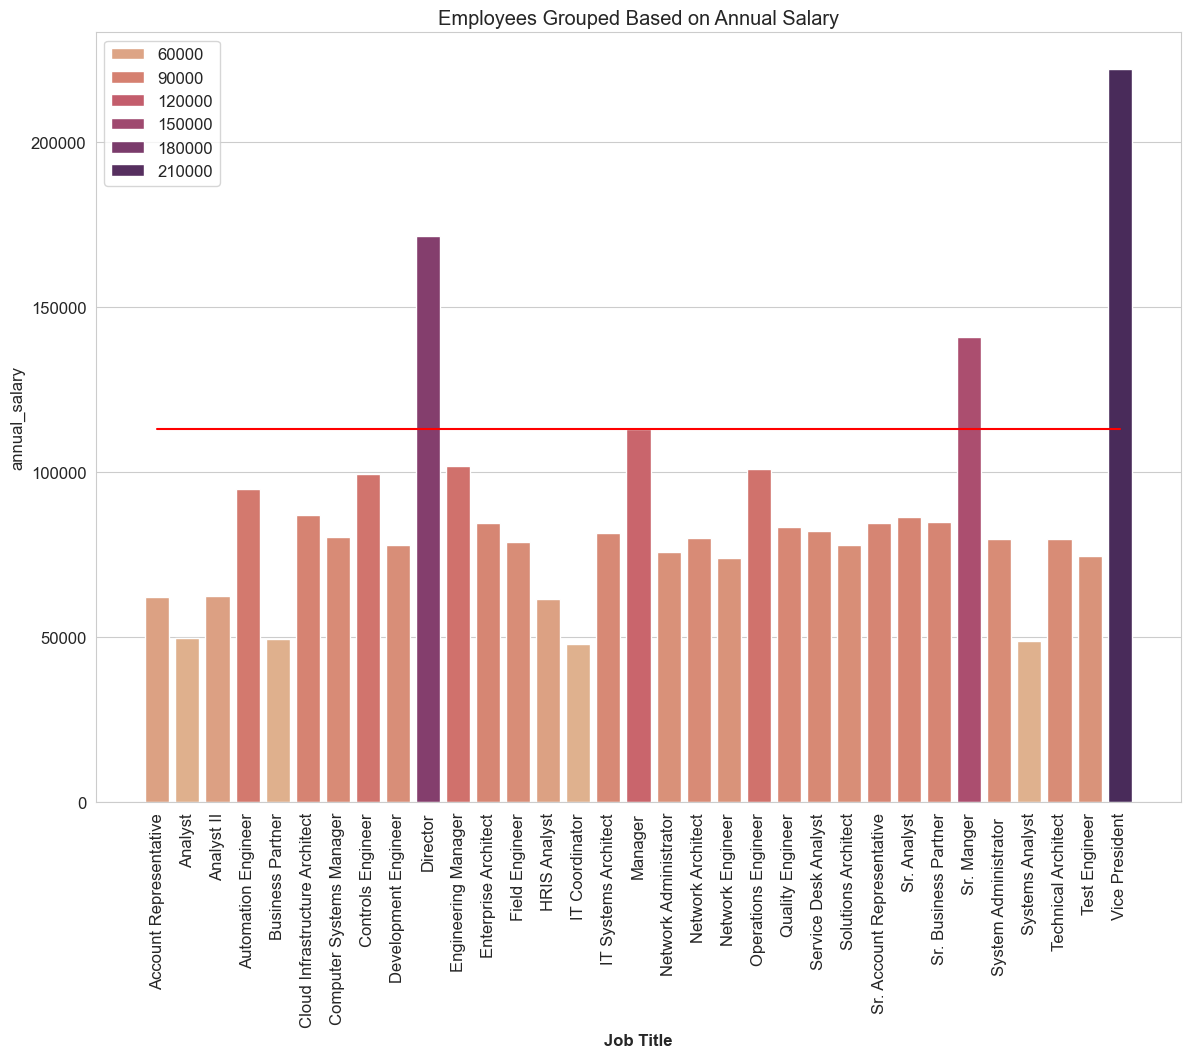

In [23]:
plt.figure(figsize=(14, 10))
matplotlib.rcParams.update({'font.size': 12})
sns.barplot(data=avg_salary_by_job , x='job_title', y='annual_salary', hue='annual_salary' , palette='flare')
sns.lineplot(data=avg_salary_by_job , x='job_title', y=(df['annual_salary'].mean()), color='red')
plt.title('Employees Grouped Based on Annual Salary')
plt.xlabel('Job Title', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.xticks(rotation=90)
plt.show()

In [24]:
no_of_emp_based_on_dept = pd.read_sql_query("select gender, department, count(*) from employees group by gender, department order by 2", con=engine.connect())
avg_salary_by_dept = pd.read_sql_query("select gender, department, AVG(annual_salary) from employees group by gender, department order by 2", con=engine.connect())

In [25]:
no_of_emp_based_on_dept

,gender,department,count
0,Male,Accounting,43
1,Female,Accounting,53
2,Male,Engineering,78
3,Female,Engineering,80
4,Male,Finance,51
5,Female,Finance,69
6,Male,Human Resources,61
7,Female,Human Resources,64
8,Male,IT,122
9,Female,IT,119


In [26]:
avg_salary_by_dept

,gender,department,avg
0,Male,Accounting,114139.046512
1,Female,Accounting,130455.245283
2,Male,Engineering,113460.346154
3,Female,Engineering,104720.700000
4,Male,Finance,123760.921569
5,Female,Finance,122094.782609
6,Male,Human Resources,115802.934426
7,Female,Human Resources,120208.218750
8,Male,IT,100187.909836
9,Female,IT,95332.554622


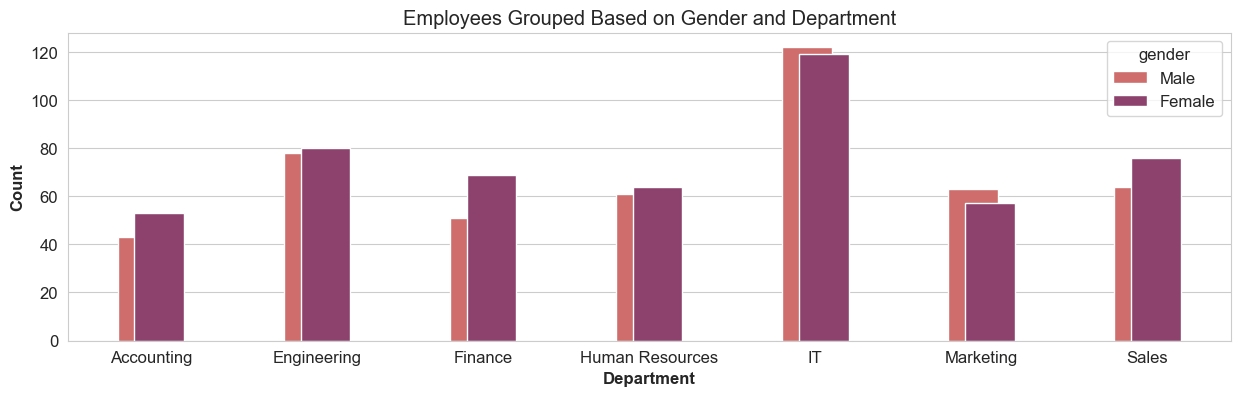

In [27]:
plt.figure(figsize=(15, 4))
matplotlib.rcParams.update({'font.size': 12})
sns.barplot(data = no_of_emp_based_on_dept, x='department', y='count', hue='gender', palette='flare', gap=4, width=0.2)
plt.title('Employees Grouped Based on Gender and Department')
plt.xlabel('Department', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.ylabel('Count', fontdict={'fontsize':12, 'fontweight':'bold'})
# plt.xticks(rotation=5)
plt.show()